# Sentiment Analysis on the Andoird app reviews using lexicon based

###### As per the Requirements from the mentor - Performing Sentiment Analysis on the provided datasets using various lexicon based approaches
#### Project flow :
1. Data collections 
   - recieved dataset of containing various android apps reviews from customer
2. Data Preprocessing
   - Done cleaning and altering the content to fit into the modelling 
3. Modelling **Lexicon-approach**
   - AFINN
   - SentiWordNet
   - NRC lexicon
4. Emotion Analyzer 
   - Custom emotion mapping
   - EmoLex
5. Analysis of the outputs
6. Conclusion
   


###### Libraries and modules imports

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings

In [136]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
df=pd.read_csv(r"D:\Sentiment_InfosysIntern\data_preprocessing\reviews.csv",encoding='latin-1')

### Data preview 
##### Seeing the contents and number of columns , analysis each column data types in it

In [138]:
df.head(3)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


In [140]:
df["userName"].unique()

array(['Mar Zur', 'Devin Rivera', 'Heidi Kinsley', ..., 'Kamiyah Dorsey',
       'Keturah Pender', 'Bhagwan Singh Virik'], dtype=object)

In [141]:
df["appId"].unique()
# print(df['content'][13953])

array(['com.anydo', 'com.todoist', 'com.ticktick.task',
       'com.habitrpg.android.habitica', 'cc.forestapp',
       'com.oristats.habitbull', 'com.levor.liferpgtasks', 'com.habitnow',
       'com.microsoft.todos', 'prox.lab.calclock',
       'com.gmail.jmartindev.timetune', 'com.artfulagenda.app',
       'com.tasks.android', 'com.appgenix.bizcal', 'com.appxy.planner'],
      dtype=object)

### DataPreprocesing
#### Performing the mentioned mentor's required technics for preprocessing the content column
1. LowerCase
2. Remove Links
3. Remove next lines
4. Words containing numbers
5. Extra spaces
6. Special characters
7. Removal of stop words
8. Stemming
9. Lemmatization

In [142]:
df['content']=df['content'].str.lower() # converting to lower case

In [143]:

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
# For the removal of stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"] # customizing the stop words by adding new stop words
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{"it's", 'is', 'was', 'were', "shouldn't", 'which', 'further', 'wouldn', 'won', 'having', "she's", 'don', "that'll", 'wasn', 'am', 'with', 'you', 'once', 'other', 'after', 'ain', 'could', 'd', 'up', "couldn't", 'under', 'i', 'off', 'my', "weren't", 'hasn', 'has', 'did', "wasn't", 'had', 'them', 'can', "should've", 't', 'because', 'that', 'below', "haven't", 'very', 's', 'few', 'an', 'to', 'yourself', "didn't", 'yours', 'during', 'over', 'doing', 'myself', 'she', 've', 'out', "hadn't", 'been', 'each', 'all', 'would', 'needn', 'itself', 'most', "mightn't", 'herself', 'there', 'him', "doesn't", 'ma', 'than', 'ourselves', "isn't", 'through', 'as', 'these', 'only', 'll', 'the', 'a', 'me', 'her', 'should', 'his', 'at', 'on', 'might', 'are', "you'd", 'so', "needn't", 'shall', 'be', 'shouldn', 'being', "you've", 'same', 'how', 'from', 'have', 'himself', 'we', 'why', 'your', 'too', 'or', 'here', "aren't", 'just', 'isn', 'm', "won't", 'while', 'mustn', 'no', 'haven', 'those', 'nor', "wouldn't", 

### Data cleaning and preprocessing pipeline
Upon the data overview , i got to know one row is empty/null in the content column , hence completely removing it

In [145]:
df = df.dropna(subset=['content'])  # removing the rows which has null values in content column

In [146]:
df.isna().sum() # no empty rows in the content column , hence we are safe to apply the preprocessing on it

reviewId                   0
userName                   0
userImage                  0
content                    0
thumbsUpCount              0
reviewCreatedVersion    2357
at                         0
replyContent            7619
repliedAt               7619
appVersion              2357
sortOrder                  0
appId                      0
dtype: int64

##### There are many slang usages in the content column , as seen during the analysis process . Hence making it to expand the words and understanding it to further information extractions

In [147]:
def create_slang_dictionary(filename): 
    chart_words = {}
    with open(filename, 'r') as file:
        for line in file:
            # Remove trailing newline character
            line = line.strip()
            # Split the line on the equals sign (=)
            abbreviation, meaning = line.split('=')
            chart_words[abbreviation] = meaning
    return chart_words

 
filename = r"D:\Sentiment_InfosysIntern\data_preprocessing\slang.txt" # recieved the file through exploration in net for data preprocessing
chart_words = create_slang_dictionary(filename)
print(chart_words) # set of slang and their expansion to it


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great', 'G9': 'Genius', 'IC': 'I See', 'IDK': 'I Do not know', 'ICQ': 'I Seek you', 'ILU': 'I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh', 'LOL': 'Laughing out loud',

##### By using set of defined functions for different types of preprocessing technique can effectively improve the code and optimize the runtime , which ultimatley enhance the readiness too

In [148]:
 # Helps to remove the html tags, due to web scraping results to present of html tags 
def remove_html_tags(text): 
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

# removes punctuations
def remove_special_character(content): 
    return re.sub(r'[^a-zA-Z ]',' ', content )

#Removal of URLs
def remove_url(content): 
    return re.sub(r'http\S+', '', content)

# remove stop words from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

#Slang expansions
def replace_string(text,chart_words): 
    words = text.split()
    new_words = []
    for word in words:
        if word.upper() in chart_words:
            new_words.append(chart_words[word.upper()])  
        else:
            new_words.append(word)
    return " ".join(new_words)  
    

###### Expansion of contract words can improve in getting the meaningful words for analysis purpose

In [149]:
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content
    

### Data preprocessing pipeline
* *Data preprocessing done by calling all the defined functions and passing the content value*

In [150]:
#Data preprocessing done by calling all the defined functions here
def data_cleaning(content):
    if not pd.isna(content):  # Check for missing values (NaN) Issue solved as removed the null rows periviously 
        content = remove_html_tags(content)
        content = remove_url(content)
        content = remove_special_character(content)
        content = contraction_expansion(content)
        content = replace_string(content,chart_words) # Expanded form
        content = remove_stopwords(content)
    return content


In [151]:
df['content']=df['content'].apply(data_cleaning) ## calling the data_cleaning function to perform on all the rows

In [152]:
df['content'].head(10)

0    recurring tasks every day need list reminder b...
1    instead shopping around downloaded widely used...
2    every blue app asks update acct emails everyth...
3    terrible update app used perfect planning cert...
4    app deceivingly terrible really nice design fe...
5    smart grocery list hell handy sort list catago...
6    wunderlist everything needed issues app replac...
7    app almost year really enjoying mostly used gr...
8    almost perfect developers choose ignore one im...
9    annoyed keep signing deleted lists ive working...
Name: content, dtype: object

<Lemmatiation as needed to get the precise words meaning for obtaining the core details of app faults clearly>

 **Lemmatization** as needed to get the exact meaning of the customer query to address the app's fault i.e to obtain **linguistic precision**, and **semantic comprehension**

In [153]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [154]:
df['content']

0        recurring task every day need list reminder bu...
1        instead shopping around downloaded widely used...
2        every blue app asks update acct email everythi...
3        terrible update app used perfect planning cert...
4        app deceivingly terrible really nice design fe...
                               ...                        
16782                                        excellent app
16783    love easy use make life organize love way put ...
16784        love make plan check app almost everyday love
16785                                       exactly needed
16786                                                 good
Name: content, Length: 16786, dtype: object

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Data Overview**

In [155]:
df['content'].info()

<class 'pandas.core.series.Series'>
Index: 16786 entries, 0 to 16786
Series name: content
Non-Null Count  Dtype 
--------------  ----- 
16786 non-null  object
dtypes: object(1)
memory usage: 262.3+ KB


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16786 non-null  object
 1   userName              16786 non-null  object
 2   userImage             16786 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16786 non-null  int64 
 5   reviewCreatedVersion  14429 non-null  object
 6   at                    16786 non-null  object
 7   replyContent          9167 non-null   object
 8   repliedAt             9167 non-null   object
 9   appVersion            14429 non-null  object
 10  sortOrder             16786 non-null  object
 11  appId                 16786 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.7+ MB


##### Question :(this question was raised by my peer intern)
As before the memory usage for the df before performing the data preprocessing was 1.5+ MB , but after the applying the data preproessing it increased to 1.7+MB . Any Guess on why its happening?


In [157]:
print('Unique reviews:%s'% df.content.nunique()) # gives us the number of unique content rows 

Unique reviews:13021


### Exploratory Data Analysis

#### WordCloud
Shows the most used words in the content, the bigger ones appearing are the most repeated words than the smaller ones

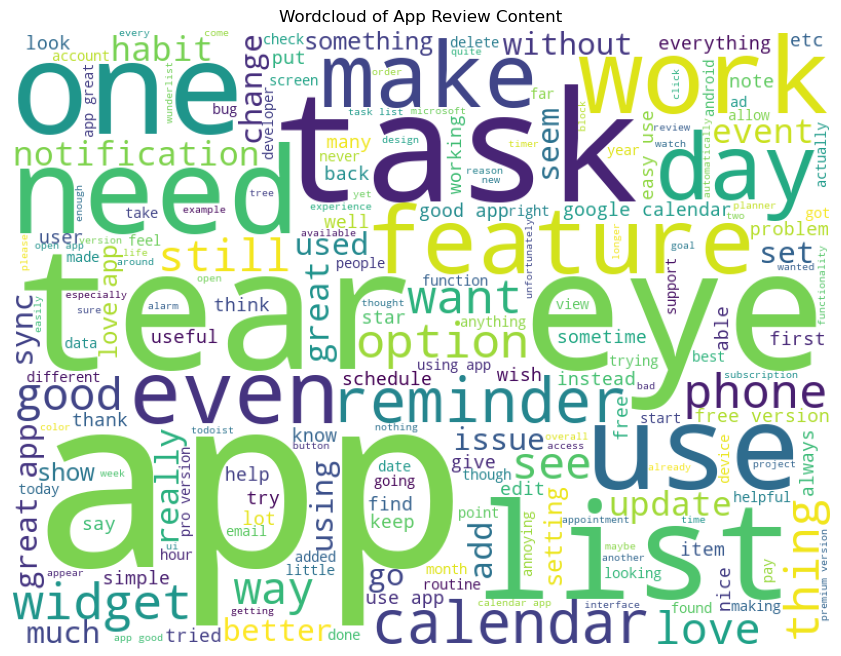

In [21]:
wordcloud = WordCloud(width=800, height=600, background_color="white")

wordcloud.generate(" ".join(df['content']))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of App Review Content")
plt.show()


To the overall **Text Length distribution**

In [160]:
df['content'].str.len().describe()

count    16786.000000
mean       149.951090
std        108.305294
min          0.000000
25%         56.000000
50%        133.000000
75%        241.000000
max       1471.000000
Name: content, dtype: float64

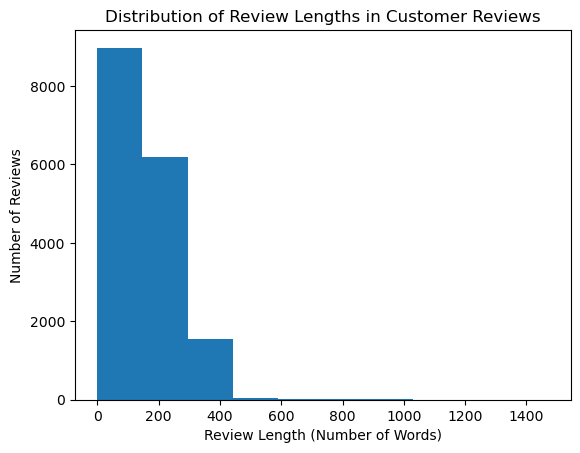

In [162]:
plt.xlabel("Review Length (Number of Words)")  
plt.ylabel("Number of Reviews")  
plt.title("Distribution of Review Lengths in Customer Reviews")  
plt.hist(df['content'].str.len()) # through Histogram also we can view the Review Length distribution
plt.show()

### Modeling: Lexicon-based approach 
#### Using Afinn library

### AFINN(Affective Influence Networks ) 
- It is simple sentiment lexicon that used for sentiment analysis in text data,Can assigns integer scores to words to indicate their sentiment polarity (positive, negative, or neutral).

In [25]:
!pip install afinn # installation

                                              0.0/52.6 kB ? eta -:--:--
     -------                                  10.2/52.6 kB ? eta -:--:--
     -----------------------------          41.0/52.6 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 52.6/52.6 kB 388.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53439 sha256=6dcfe6911dd64382978e17f1b333019ee221596202eb1348fd2d6b140b5cecb1
  Stored in directory: c:\users\laksh\appdata\local\pip\cache\wheels\ee\d3\a0\f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# lexicons -> score= (positive words - negative words )/(words)
from afinn import Afinn
afinn = Afinn()
def get_afinn_score(text): ## getting score
    return afinn.score(text)

def get_sentiment_label(score): ## setting labels
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [23]:
df['sentiment_score_afinn'] = df['content'].apply(get_afinn_score)
df['sentiment_label_afinn'] = df['sentiment_score_afinn'].apply(get_sentiment_label)
sentiment_df=df[['content','sentiment_label_afinn','sentiment_score_afinn','appId']]

In [24]:
sentiment_df.head(10)

,content,sentiment_label_afinn,sentiment_score_afinn,appId
0,recurring task every day need list reminder bu...,negative,-4.0,com.anydo
1,instead shopping around downloaded widely used...,positive,3.0,com.anydo
2,every blue app asks update acct email everythi...,negative,-10.0,com.anydo
3,terrible update app used perfect planning cert...,positive,4.0,com.anydo
4,app deceivingly terrible really nice design fe...,neutral,0.0,com.anydo
5,smart grocery list hell handy sort list catago...,negative,-2.0,com.anydo
6,wunderlist everything needed issue app replace...,positive,2.0,com.anydo
7,app almost year really enjoying mostly used gr...,neutral,0.0,com.anydo
8,almost perfect developer choose ignore one imp...,negative,-1.0,com.anydo
9,annoyed keep signing deleted list ive working ...,positive,1.0,com.anydo


#### Viewing the Distribution of the Positive , Negative , Neutral through AFINN assigned lables

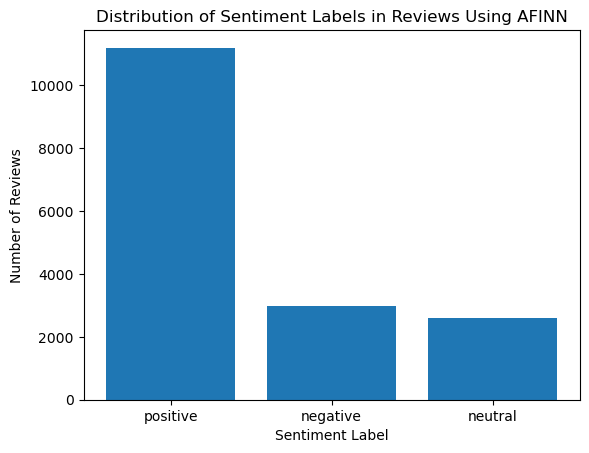

In [26]:
sentiment_counts = sentiment_df['sentiment_label_afinn'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Sentiment Labels in Reviews Using AFINN")
plt.show()

#### Analysis of the Positive , Negative , Neutral Words usages through wordCloud

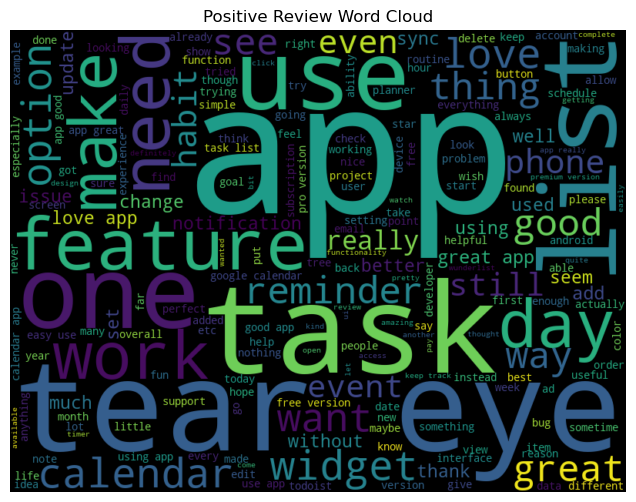

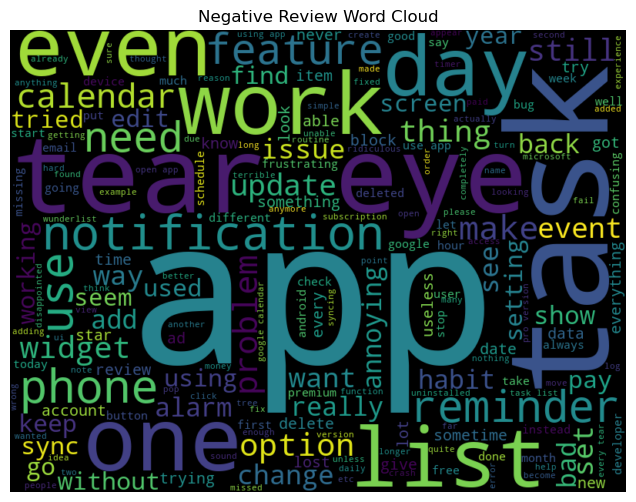

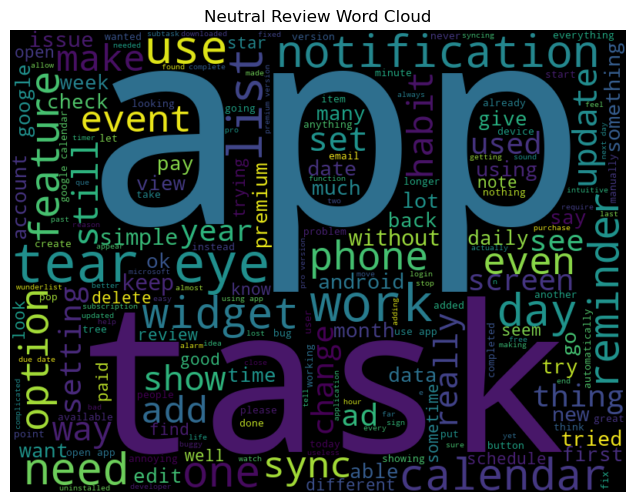

In [88]:
def generate_wordcloud(sentiment_label):
    filtered_data = sentiment_df[sentiment_df['sentiment_label_afinn'] == sentiment_label]['content']
    text = " ".join(filtered_data)  

      # Create and display the word cloud
    wordcloud = WordCloud(width=800, height=600).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment_label.capitalize()} Review Word Cloud")
    plt.show()


generate_wordcloud("positive")
generate_wordcloud("negative")
generate_wordcloud("neutral")

#### Using SentiWordNet

## SentiWordNet 
- It is a lexical database associates words with sentiment scores and synsets **sets of synonyms**. It provides a richer picture of sentiment by considering both positive and negative aspects of a word

In [1]:
### using SentiWordNet- installation 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


True

In [82]:

from nltk.corpus import sentiwordnet as swn
def get_sentiwordnet_score(sentence): # gets the score of the each sentences in content
    sentiment_score = 0.0
    pos_score = 0.0
    neg_score = 0.0

    tokens = nltk.word_tokenize(sentence)  # Tokenize the sentence
    for token in tokens:
        synsets = swn.senti_synsets(token)
        if synsets:
            for synset in synsets:
                pos, neg, obj = synset.pos_score(), synset.neg_score(), synset.obj_score()
                sentiment_score += (pos - neg)
                pos_score += pos
                neg_score += neg

  # Calculate overall sentiment based on score
    if sentiment_score > 0:
        sentiment = "Positive"
    elif sentiment_score < 0:
        sentiment = "Negative"
    else:
        sentiment = "Objective"

    return sentiment,pos_score,neg_score,sentiment_score # returns a tuple with the set of info

In [83]:
sentiment_s = []
for content in sentiment_df['content']:
    sentiment, pos_score,neg_score,sentiment_score = get_sentiwordnet_score(content)
    sentiment_s.append((sentiment, pos_score, neg_score,sentiment_score))

sentiment_df['sentiment_sentiwordnetinfo'] = sentiment_s
sentiment_df['sentiment_sentiwordnet_pos']=sentiment_df['sentiment_sentiwordnetinfo'].apply(lambda x:x[1])
sentiment_df['sentiment_sentiwordnet_neg']=sentiment_df['sentiment_sentiwordnetinfo'].apply(lambda x:x[2])
sentiment_df['sentiment_score_sentiwordnet']=sentiment_df['sentiment_sentiwordnetinfo'].apply(lambda x:x[3])
sentiment_df['sentiment_label_sentiwordnet']=sentiment_df['sentiment_sentiwordnetinfo'].apply(lambda x:x[0])

## NRCLexicon 
   - This lexicon focuses on emotions and provides sentiment scores for words based on **nine different emotions** like anger, fear, joy, and trust. This can be useful for **more nuanced sentiment analysis**. 


In [85]:
nltk.download('vader_lexicon') # installation

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...


True

In [99]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

# Sentiment analyzer object
analyzer = sia()

def get_nrc_sentiment(sentence):
    text = nltk.word_tokenize(sentence)  # Tokenize the text
 
    sentiment_scores = analyzer.polarity_scores(sentence) # calculation of sentiment score using nrc library

    return sentiment_scores

# Apply the function to your content column
sentiment_df['sentiment_nrc'] = sentiment_df['content'].apply(get_nrc_sentiment)


In [106]:
# apply the labels for the respective nrc_scores
def label_sentiment(nrc_score_dict):
    compound_score = nrc_score_dict['compound']
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

sentiment_df['sentiment_label_nrc'] = sentiment_df['sentiment_nrc'].apply(label_sentiment)

In [107]:
sentiment_df

,content,sentiment_label_afinn,sentiment_score_afinn,appId,sentiment_sentiwordnetinfo,sentiment_sentiwordnet_pos,sentiment_sentiwordnet_neg,sentiment_score_sentiwordnet,sentiment_label_sentiwordnet,sentiment_nrc,sentiment_label_nrc
0,recurring task every day need list reminder bu...,negative,-4.0,com.anydo,"(Positive, 44.292, 17.833, 26.459)",44.292,17.833,26.459,Positive,"{'neg': 0.192, 'neu': 0.709, 'pos': 0.099, 'co...",Negative
1,instead shopping around downloaded widely used...,positive,3.0,com.anydo,"(Positive, 18.25, 11.625, 6.625)",18.250,11.625,6.625,Positive,"{'neg': 0.052, 'neu': 0.887, 'pos': 0.062, 'co...",Positive
2,every blue app asks update acct email everythi...,negative,-10.0,com.anydo,"(Negative, 29.417, 29.583, -0.16599999999999993)",29.417,29.583,-0.166,Negative,"{'neg': 0.193, 'neu': 0.771, 'pos': 0.037, 'co...",Negative
3,terrible update app used perfect planning cert...,positive,4.0,com.anydo,"(Positive, 25.0, 16.625, 8.375)",25.000,16.625,8.375,Positive,"{'neg': 0.124, 'neu': 0.619, 'pos': 0.257, 'co...",Positive
4,app deceivingly terrible really nice design fe...,neutral,0.0,com.anydo,"(Positive, 20.0, 16.75, 3.25)",20.000,16.750,3.250,Positive,"{'neg': 0.105, 'neu': 0.593, 'pos': 0.302, 'co...",Positive
...,...,...,...,...,...,...,...,...,...,...,...
16782,excellent app,positive,3.0,com.appxy.planner,"(Positive, 1.0, 0.0, 1.0)",1.000,0.000,1.000,Positive,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",Positive
16783,love easy use make life organize love way put ...,positive,13.0,com.appxy.planner,"(Positive, 38.5, 4.5, 34.0)",38.500,4.500,34.000,Positive,"{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'comp...",Positive
16784,love make plan check app almost everyday love,positive,6.0,com.appxy.planner,"(Positive, 13.25, 1.375, 11.875)",13.250,1.375,11.875,Positive,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",Positive
16785,exactly needed,neutral,0.0,com.appxy.planner,"(Positive, 1.0, 0.625, 0.375)",1.000,0.625,0.375,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


### Extra Addition of Techniques by Exploring on my own

## Emotion Analyzer 

#### Understanding the emotions expressed in customer reviews offers a wealth of valuable information for businesses like Uncover Underlying Reasons , Identify Pain Points ,Personalize Customer Interactions ,Develop Targeted Marketing etc..



### By Custom Emotion Mapping
By using the compound Score from the nrc_sentiment , we can make use of it to apply the emotions on the customer reviews, this emotions can be further be enhanced by additing more map words

In [112]:
# Example custom emotion mapping (adjust based on your data and desired emotions)

emotion_mapping = {
    "angry": ["hate", "infuriate", "furious", "rage"],
    "sad": ["depressed", "lonely", "sorrowful", "grief"],
    "joy": ["happy", "elated", "delighted", "excited"]
}

# Function to identify potential emotions based on custom mapping
def get_possible_emotions(sentence, nrc_sentiment):
    possible_emotions = []
    words = nltk.word_tokenize(sentence.lower())
    for word in words:
        for emotion, emotion_words in emotion_mapping.items():
            if word in emotion_words:
                possible_emotions.append(emotion)
  
    if nrc_sentiment['compound'] >= 0.05:  # Positive sentiment might influence emotions like joy / happiness
        if "joy" not in possible_emotions:
            possible_emotions.append("joy")
    elif nrc_sentiment['compound'] <= -0.05:  # Negative sentiment might influence emotions like anger or sadness
        if "anger" not in possible_emotions:
            possible_emotions.append("anger")
        if "sadness" not in possible_emotions:
            possible_emotions.append("sadness")

    return possible_emotions

# Apply the function on sentiment_df, 
sentiment_df['possible_nrc_emotions'] = sentiment_df[['content', 'sentiment_nrc']].apply(lambda x: get_possible_emotions(x['content'], x['sentiment_nrc']), axis=1)


In [113]:
sentiment_df

,content,sentiment_label_afinn,sentiment_score_afinn,appId,sentiment_sentiwordnetinfo,sentiment_sentiwordnet_pos,sentiment_sentiwordnet_neg,sentiment_score_sentiwordnet,sentiment_label_sentiwordnet,sentiment_nrc,sentiment_label_nrc,possible_nrc_emotions
0,recurring task every day need list reminder bu...,negative,-4.0,com.anydo,"(Positive, 44.292, 17.833, 26.459)",44.292,17.833,26.459,Positive,"{'neg': 0.192, 'neu': 0.709, 'pos': 0.099, 'co...",Negative,"[anger, sadness]"
1,instead shopping around downloaded widely used...,positive,3.0,com.anydo,"(Positive, 18.25, 11.625, 6.625)",18.250,11.625,6.625,Positive,"{'neg': 0.052, 'neu': 0.887, 'pos': 0.062, 'co...",Positive,[joy]
2,every blue app asks update acct email everythi...,negative,-10.0,com.anydo,"(Negative, 29.417, 29.583, -0.16599999999999993)",29.417,29.583,-0.166,Negative,"{'neg': 0.193, 'neu': 0.771, 'pos': 0.037, 'co...",Negative,"[anger, sadness]"
3,terrible update app used perfect planning cert...,positive,4.0,com.anydo,"(Positive, 25.0, 16.625, 8.375)",25.000,16.625,8.375,Positive,"{'neg': 0.124, 'neu': 0.619, 'pos': 0.257, 'co...",Positive,[joy]
4,app deceivingly terrible really nice design fe...,neutral,0.0,com.anydo,"(Positive, 20.0, 16.75, 3.25)",20.000,16.750,3.250,Positive,"{'neg': 0.105, 'neu': 0.593, 'pos': 0.302, 'co...",Positive,[joy]
...,...,...,...,...,...,...,...,...,...,...,...,...
16782,excellent app,positive,3.0,com.appxy.planner,"(Positive, 1.0, 0.0, 1.0)",1.000,0.000,1.000,Positive,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",Positive,[joy]
16783,love easy use make life organize love way put ...,positive,13.0,com.appxy.planner,"(Positive, 38.5, 4.5, 34.0)",38.500,4.500,34.000,Positive,"{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'comp...",Positive,[joy]
16784,love make plan check app almost everyday love,positive,6.0,com.appxy.planner,"(Positive, 13.25, 1.375, 11.875)",13.250,1.375,11.875,Positive,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",Positive,[joy]
16785,exactly needed,neutral,0.0,com.appxy.planner,"(Positive, 1.0, 0.625, 0.375)",1.000,0.625,0.375,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,[]


## Emolex 
  ##### EmoLex is a lexicon resource that categorizes words into eight basic emotions:

- Anger
- Anticipation
- Fear
- Joy
- Sadness
- Surprise
- Trust
- disgust

Downloaded the Text File from the internet
resource - [LINK To WebSite](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)

In [121]:
emolex_data = pd.read_csv("D:\Sentiment_InfosysIntern\lakshita\SentimentAnalysis-TextClassification\Hindi-NRC-EmoLex.txt",sep='\t')

In [126]:

def get_emolex_scores(sentence):
    emolex_data = pd.read_csv("D:\Sentiment_InfosysIntern\lakshita\SentimentAnalysis-TextClassification\Hindi-NRC-EmoLex.txt",sep='\t')
    words = nltk.word_tokenize(sentence)  # Tokenize the text
    # creating a dict of 8 emotions , score 0-5
    emolex_scores = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 
                   'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}

  # Look up word scores in EmoLex data
    for word in words:
        word_data = emolex_data[emolex_data['English Word'] == word]
        if not word_data.empty:
            for emotion in emolex_scores.keys():

                score = word_data[emotion].values[0]  # Assuming a single score per emotion
                emolex_scores[emotion] += score

    return emolex_scores

sentiment_df['emolex_scores'] = sentiment_df['content'].apply(get_emolex_scores)

In [188]:
sentiment_df['emolex_scores'][0]

{'anger': 1,
 'anticipation': 4,
 'disgust': 0,
 'fear': 2,
 'joy': 1,
 'sadness': 1,
 'surprise': 0,
 'trust': 1}

In [206]:
sentiment_df

,content,sentiment_label_afinn,sentiment_score_afinn,appId,sentiment_sentiwordnetinfo,sentiment_sentiwordnet_pos,sentiment_sentiwordnet_neg,sentiment_score_sentiwordnet,sentiment_label_sentiwordnet,sentiment_nrc,sentiment_label_nrc,possible_nrc_emotions,emolex_scores
0,recurring task every day need list reminder bu...,negative,-4.0,com.anydo,"(Positive, 44.292, 17.833, 26.459)",44.292,17.833,26.459,Positive,"{'neg': 0.192, 'neu': 0.709, 'pos': 0.099, 'co...",Negative,"[anger, sadness]","{'anger': 1, 'anticipation': 4, 'disgust': 0, ..."
1,instead shopping around downloaded widely used...,positive,3.0,com.anydo,"(Positive, 18.25, 11.625, 6.625)",18.250,11.625,6.625,Positive,"{'neg': 0.052, 'neu': 0.887, 'pos': 0.062, 'co...",Positive,[joy],"{'anger': 1, 'anticipation': 4, 'disgust': 1, ..."
2,every blue app asks update acct email everythi...,negative,-10.0,com.anydo,"(Negative, 29.417, 29.583, -0.16599999999999993)",29.417,29.583,-0.166,Negative,"{'neg': 0.193, 'neu': 0.771, 'pos': 0.037, 'co...",Negative,"[anger, sadness]","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
3,terrible update app used perfect planning cert...,positive,4.0,com.anydo,"(Positive, 25.0, 16.625, 8.375)",25.000,16.625,8.375,Positive,"{'neg': 0.124, 'neu': 0.619, 'pos': 0.257, 'co...",Positive,[joy],"{'anger': 2, 'anticipation': 3, 'disgust': 1, ..."
4,app deceivingly terrible really nice design fe...,neutral,0.0,com.anydo,"(Positive, 20.0, 16.75, 3.25)",20.000,16.750,3.250,Positive,"{'neg': 0.105, 'neu': 0.593, 'pos': 0.302, 'co...",Positive,[joy],"{'anger': 2, 'anticipation': 2, 'disgust': 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16782,excellent app,positive,3.0,com.appxy.planner,"(Positive, 1.0, 0.0, 1.0)",1.000,0.000,1.000,Positive,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",Positive,[joy],"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
16783,love easy use make life organize love way put ...,positive,13.0,com.appxy.planner,"(Positive, 38.5, 4.5, 34.0)",38.500,4.500,34.000,Positive,"{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'comp...",Positive,[joy],"{'anger': 0, 'anticipation': 1, 'disgust': 0, ..."
16784,love make plan check app almost everyday love,positive,6.0,com.appxy.planner,"(Positive, 13.25, 1.375, 11.875)",13.250,1.375,11.875,Positive,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",Positive,[joy],"{'anger': 0, 'anticipation': 1, 'disgust': 0, ..."
16785,exactly needed,neutral,0.0,com.appxy.planner,"(Positive, 1.0, 0.625, 0.375)",1.000,0.625,0.375,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,[],"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."


In [210]:
# Saving the necessary output columns in sentiment-output-lakshita.csv file

sentiment_save=sentiment_df[["content","sentiment_label_afinn","sentiment_score_afinn","sentiment_label_sentiwordnet",
                             "sentiment_score_sentiwordnet",
                             "sentiment_label_nrc","emolex_scores"]]
sentiment_save.to_csv("D:\Sentiment_InfosysIntern\lakshita\SentimentAnalysis-TextClassification\sentiment-output-lakshita",index=False,sep='\t')



### Analysis of the Labels from Different Models
### AFINN

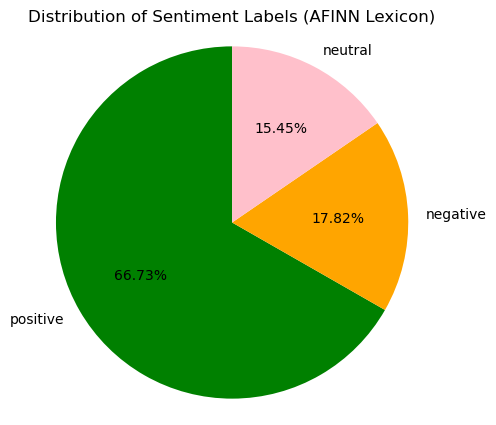

In [184]:

# Count occurrences of each sentiment label using value_counts()
sentiment_counts = sentiment_df['sentiment_label_afinn'].value_counts().reset_index(name='count')


plt.figure(figsize=(5, 5))  
# Using pie Chart
plt.pie(sentiment_counts['count'], labels=sentiment_counts['sentiment_label_afinn'], autopct="%1.2f%%", startangle=90,
       colors=['green', 'orange', 'pink'])  

plt.title("Distribution of Sentiment Labels (AFINN Lexicon)")
plt.axis('equal')  
plt.show()

### SentiWordNet

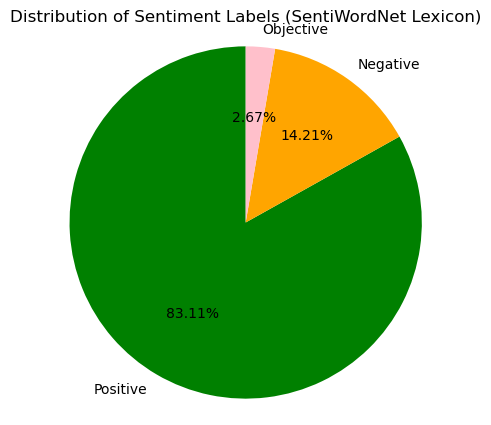

In [185]:
sentiment_counts = sentiment_df['sentiment_label_sentiwordnet'].value_counts().reset_index(name='count')


plt.figure(figsize=(5, 5))  
# Using pie Chart
plt.pie(sentiment_counts['count'], labels=sentiment_counts['sentiment_label_sentiwordnet'], autopct="%1.2f%%", startangle=90,
       colors=['green', 'orange', 'pink'])  


plt.title("Distribution of Sentiment Labels (SentiWordNet Lexicon)")
plt.axis('equal')  
plt.show()

### NRC Lexicon

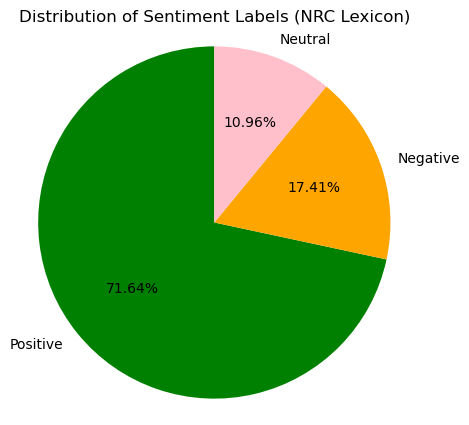

In [186]:
sentiment_counts = sentiment_df['sentiment_label_nrc'].value_counts().reset_index(name='count')


plt.figure(figsize=(5, 5))  
# Using pie Chart
plt.pie(sentiment_counts['count'], labels=sentiment_counts['sentiment_label_nrc'], autopct="%1.2f%%", startangle=90,
       colors=['green', 'orange', 'pink'])  # Adjust startangle for better slice visibility


plt.title("Distribution of Sentiment Labels (NRC Lexicon)")
plt.axis('equal')  
plt.show()

## Conclusion on Analysis 
We see that the dominance is **positive labelled** reviews from the customers , But there is a variations between the different modelling usages 
    
In the **AFINN** , and **NRC** approach have labelled almost similar percentile as negative , neutral , Where as the **SentiNetWord** leaned more on the positive side 
     

### More Analysis on the Emotions

#### 1st Histogram - shows how many reviews have each emotion (anger, anticipation, etc.) as the dominant emotion based on the maximum score

#### 2nd Histogram - The distribution of maximum emotion scores themselves  helps to gauge the general emotional intensity present in the customer reviews and identify potential areas where emotions run high (+ve or -ve).

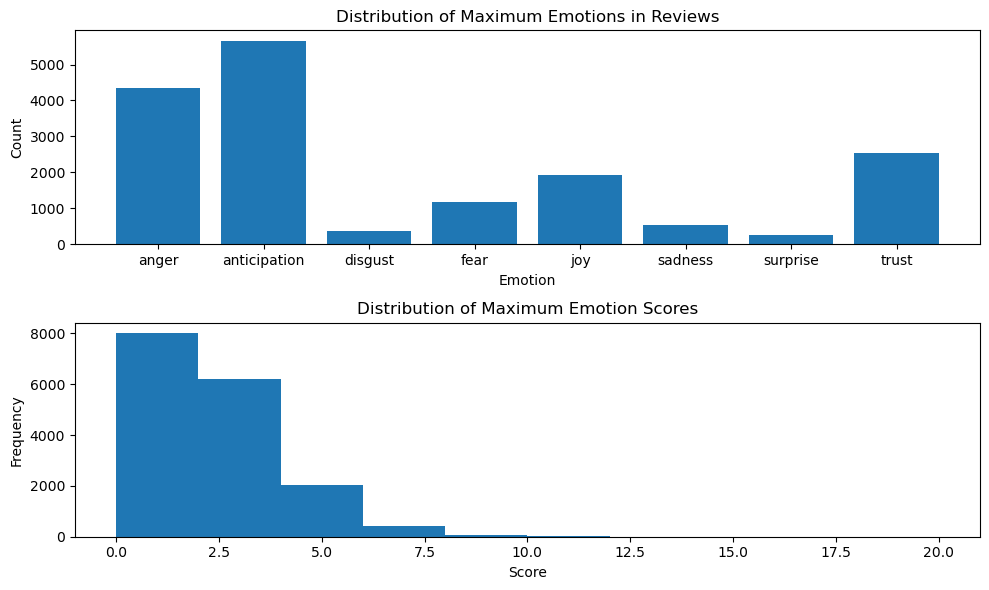

In [189]:
def get_max_emotion(emolex_scores):
    max_value = max(emolex_scores.values())
    max_emotion = max(emolex_scores, key=emolex_scores.get)
    return max_emotion, max_value

# Lists to store maximum emotions and scores
max_emotions = []
max_scores = []

# Iterate through EmoLex scores in each row
for emolex_scores in sentiment_df['emolex_scores']:
    emotion, score = get_max_emotion(emolex_scores)
    max_emotions.append(emotion)
    max_scores.append(score)

# dictionaries to count emotion occurrences 0-5
emotion_counts = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 
                  'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
for emotion in max_emotions:
    emotion_counts[emotion] += 1  # Increment count for each emotion

    
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(emotion_counts.keys(), emotion_counts.values())
plt.title("Distribution of Maximum Emotions in Reviews")
plt.xlabel("Emotion")
plt.ylabel("Count")

plt.subplot(2, 1, 2)
plt.hist(max_scores)
plt.title("Distribution of Maximum Emotion Scores")

plt.xlabel("Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 🙌Thank you Infosys for the wonderful opportunity to showcase my Work!!